In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
df=pd.read_csv("Social_Network_Ads (3).csv")

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
df.shape

(400, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


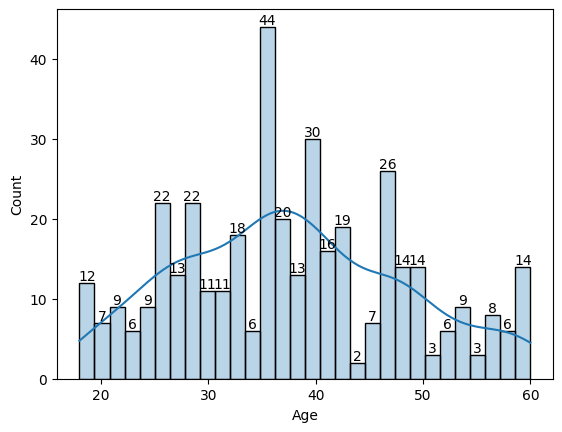

In [19]:
histplot=sns.histplot(df["Age"],kde=True, bins=30, alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i)
plt.show()

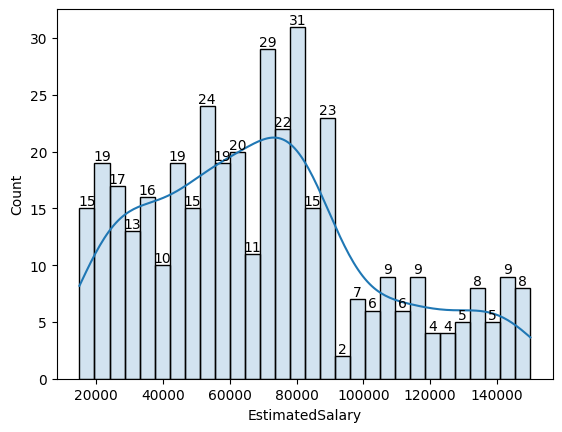

In [20]:
histplot= sns.histplot(df["EstimatedSalary"], kde=True, alpha=0.2, bins=30)
for i in histplot.containers:
    histplot.bar_label(i)
plt.show()

In [21]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [22]:
def gender_encoder(value):
    if(value=="Male"):
        return 1
    elif(value=="Female"):
        return 0
    else:
        return -1
    

In [23]:
df["Gender"]=df["Gender"].apply(gender_encoder)

In [24]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

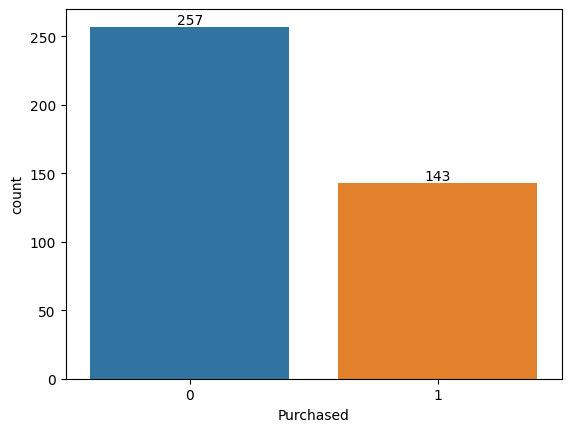

In [27]:
countplot= sns.countplot(x=df['Purchased'])
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

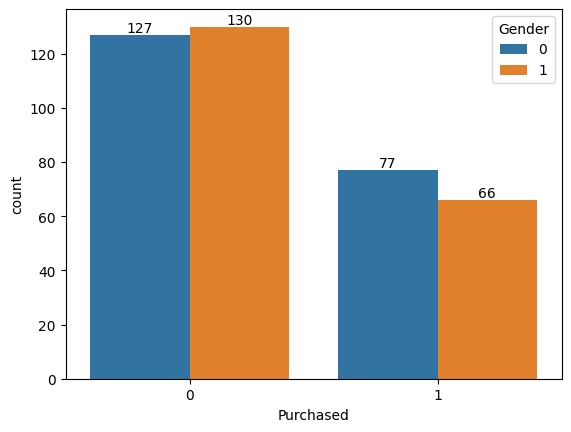

In [29]:
countplot= sns.countplot(x=df['Purchased'], hue=df['Gender'])
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

<Axes: >

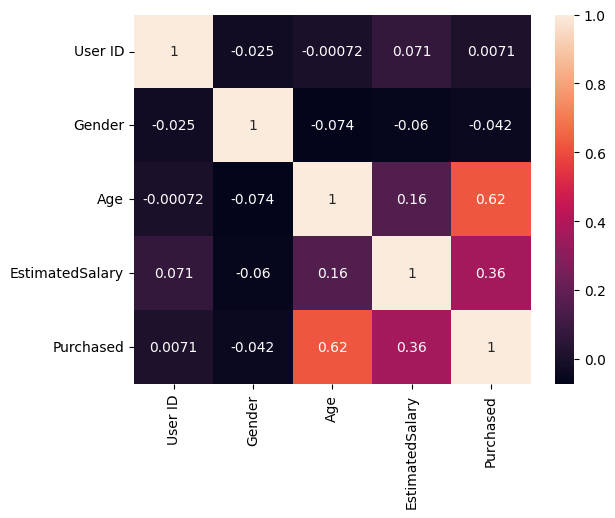

In [30]:
sns.heatmap(df.corr(), annot=True)

In [32]:
X=df[['Age','EstimatedSalary']]
y= df['Purchased']

In [34]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [41]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred= model.predict(X_test)

In [44]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


(<Figure size 300x300 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

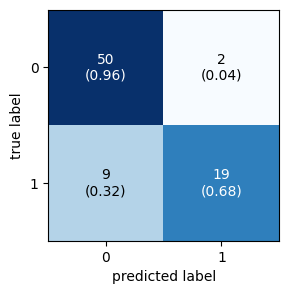

In [50]:
plot_confusion_matrix(conf_mat=cm, figsize=(3,3), show_normed=True)

In [54]:
print(f"TN {cm[0][0]}")
print(f"FP {cm[0][1]}")
print(f"FN {cm[1][0]}")
print(f"TP {cm[1][1]}")

TN 50
FP 2
FN 9
TP 19


In [56]:
print(f"Accuracy score is{accuracy_score(y_test, y_pred)}")

Accuracy score is0.8625


In [57]:
print(f"Error rate is{1- accuracy_score(y_test, y_pred)}")

Error rate is0.13749999999999996


In [59]:
print(f"Precision score is {precision_score(y_test, y_pred)}")

Precision score is 0.9047619047619048


In [60]:
print(f"Recall score is{recall_score(y_test, y_pred)}")

Recall score is0.6785714285714286


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

